In [78]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# LEEMOS HECHOS Y HECHAMOS UN PRIMER VISTAZO A TIPOS DE DATOS Y DEMAS

In [79]:
hechos = pd.read_excel("homicidios.xlsx", sheet_name=0)
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [80]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [81]:
hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

# ELIMINACION DE COLUMNAS INNECESARIAS

In [82]:
hechos.drop(['AAAA', 'DD', 'HORA', "Altura", "Cruce", "XY (CABA)", "PARTICIPANTES"], axis=1, inplace=True)

# Analisis de duplicados

In [83]:
hechos[hechos.duplicated]

,ID,N_VICTIMAS,FECHA,MM,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,pos x,pos y,VICTIMA,ACUSADO


# ANALISIS DE VALORES FALTANTES

In [84]:
hechos.isna().sum()

ID                       0
N_VICTIMAS               0
FECHA                    0
MM                       0
HH                       0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
Calle                    1
Dirección Normalizada    8
COMUNA                   0
pos x                    0
pos y                    0
VICTIMA                  0
ACUSADO                  0
dtype: int64

In [85]:
hechos.replace("SD", np.nan, inplace=True)
hechos.isnull().sum()

ID                        0
N_VICTIMAS                0
FECHA                     0
MM                        0
HH                        1
LUGAR_DEL_HECHO           1
TIPO_DE_CALLE             0
Calle                     1
Dirección Normalizada     8
COMUNA                    0
pos x                     0
pos y                     0
VICTIMA                   9
ACUSADO                  23
dtype: int64

# ANALISIS DE CALLES QUE SE REPITEN

In [86]:
hechos["Calle"].value_counts()

PAZ, GRAL. AV.                                57
RIVADAVIA AV.                                 19
DEL LIBERTADOR AV.                            18
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
                                              ..
PILCOMAYO                                      1
CERVANTES                                      1
CONGRESO AV.                                   1
AUSTRALIA AV.                                  1
PADRE CARLOS MUJICA                            1
Name: Calle, Length: 279, dtype: int64

# VER SI ALGUNA DIRECCION ES PROBLEMATICA (SE REPITE MUCHO)

In [87]:
hechos["Dirección Normalizada"].value_counts()

27 DE FEBRERO AV. y ESCALADA AV.                  5
PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.         4
PAZ, GRAL. AV. y DEL LIBERTADOR AV.               4
INDEPENDENCIA AV. y CEVALLOS, VIRREY              3
ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO    3
                                                 ..
AUTOPISTA PERITO MORENO y AUTOPISTA 25 DE MAYO    1
CHORROARIN y SAN MARTIN AV.                       1
COSQUIN y ROCA, CNEL. AV.                         1
ROCA, CNEL. AV. 3555                              1
PADRE CARLOS MUGICA 709                           1
Name: Dirección Normalizada, Length: 635, dtype: int64

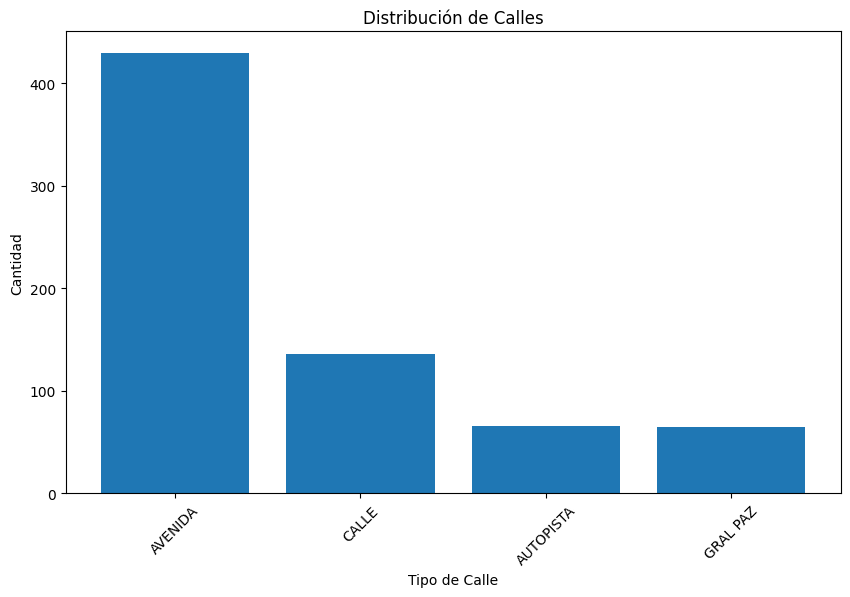

In [88]:
plt.figure(figsize=(10, 6))
plt.bar(list(hechos["TIPO_DE_CALLE"].value_counts().index), list(hechos["TIPO_DE_CALLE"].value_counts().values))
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad')
plt.title('Distribución de Calles')
plt.xticks(rotation=45) 
plt.show()

# La Avenida General Paz es una autopista de 24,3 km de extensión
![Alt text](image.png)

In [89]:
hechos["pos x"] = pd.to_numeric(hechos["pos x"], errors="coerce").fillna(np.NaN).astype(float)
hechos["pos y"] = pd.to_numeric(hechos["pos y"], errors="coerce").fillna(np.NaN).astype(float)
hechos["pos y"].isna().sum()

12

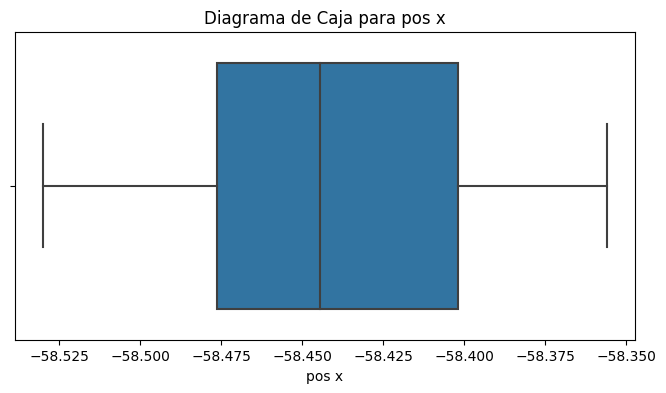

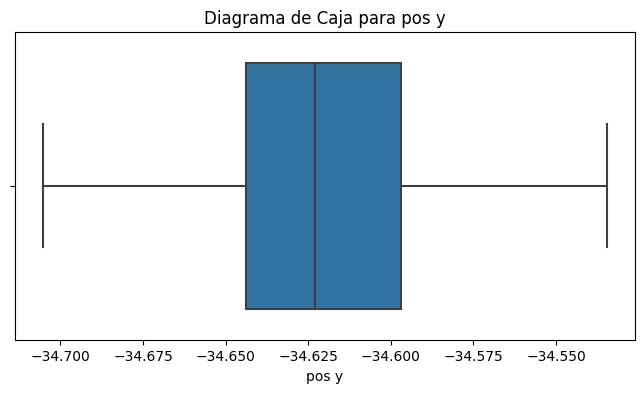

In [90]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=hechos["pos x"])
plt.xlabel("pos x")
plt.title("Diagrama de Caja para pos x")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=hechos["pos y"])
plt.xlabel("pos y")
plt.title("Diagrama de Caja para pos y")
plt.show()

In [91]:
import folium

# Crea un mapa centrado en una coordenada específica
mapa = folium.Map(location=[hechos["pos y"].iloc[10], hechos["pos x"].iloc[10]], zoom_start=10)

# Agrega marcadores en las coordenadas deseadas
for x,y in zip(hechos["pos y"].dropna(),hechos["pos x"].dropna()):
    if x == np.nan or y == np.nan:
        continue
    folium.Marker([x, y], tooltip='Ubicación 1').add_to(mapa)

# Muestra el mapa interactivo
mapa

<function matplotlib.pyplot.show(close=None, block=None)>

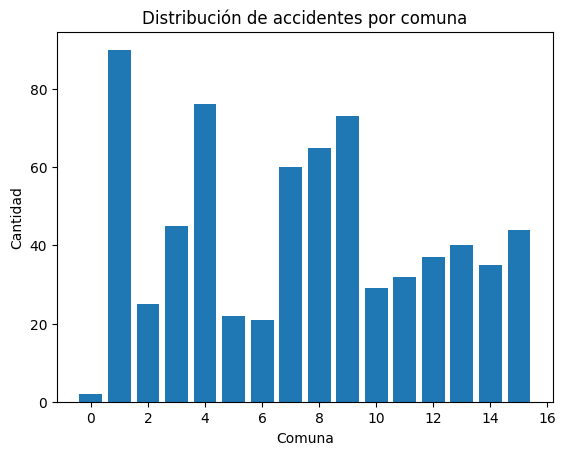

In [92]:
data = hechos["COMUNA"].value_counts()
plt.bar(data.index,data.values)
plt.xlabel('Comuna')
plt.ylabel('Cantidad')
plt.title('Distribución de accidentes por comuna')
plt.show


# La Comuna 1 está integrada por los barrios de Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución

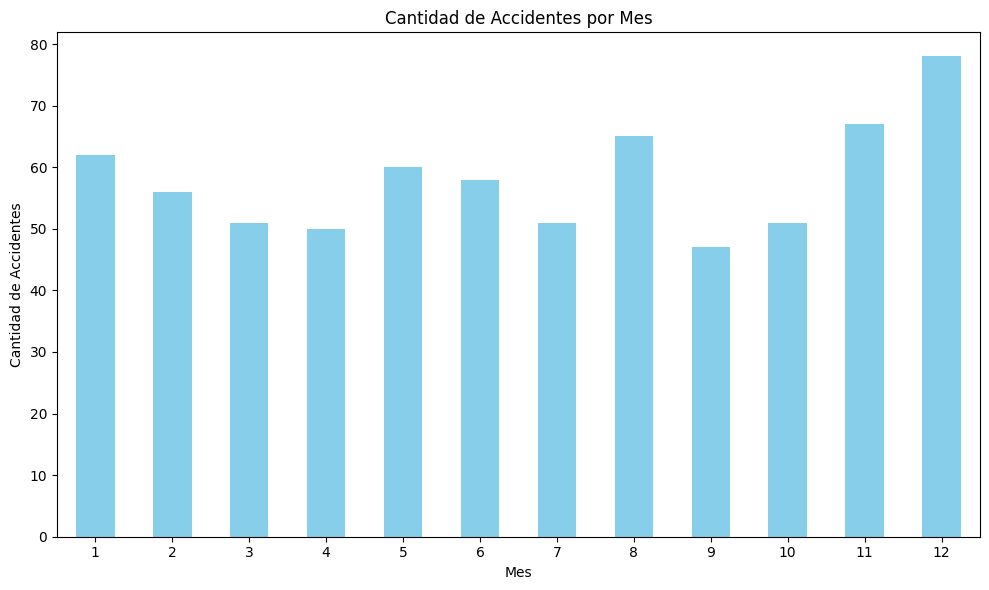

In [93]:
accidentes_por_mes = hechos.groupby('MM').size()
plt.figure(figsize=(10, 6))
accidentes_por_mes.plot(kind='bar', color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes por Mes')
plt.xticks(rotation=0)  # No rotar las etiquetas del eje x
plt.tight_layout()
plt.show()

# Calculan que en el último mes del año se producen un 20 % más de siniestros; "la principal causa es el estrés acumulado de estos días", el jefe de Seguridad Vial del Cesvi . Cifras alarmantes sobre los jóvenes y el alcohol

# HORARIO DE LOS ACCIDENTES

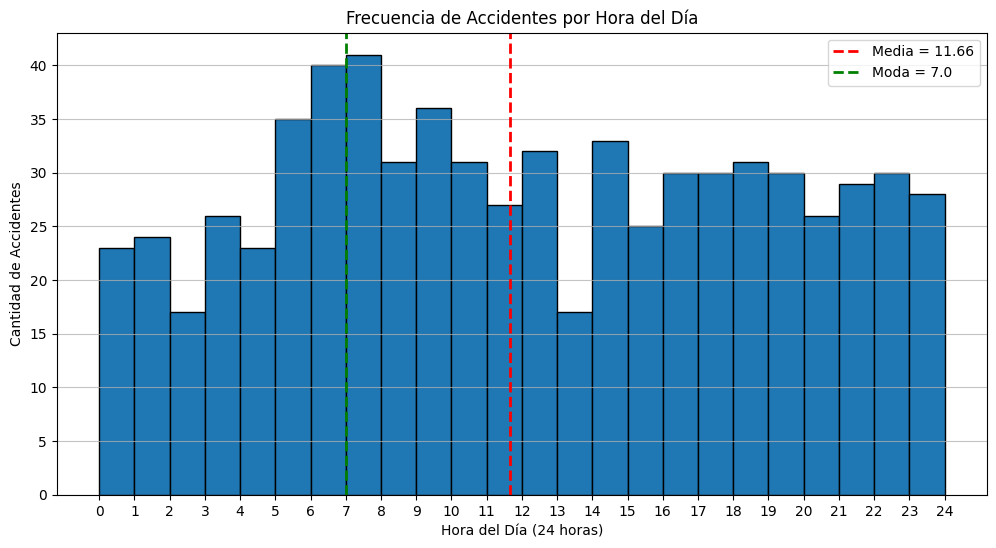

In [94]:
plt.figure(figsize=(12, 6))
media_hora = hechos['HH'].mean()
moda_hora = hechos['HH'].mode().values[0]
plt.hist(hechos['HH'], bins=24, edgecolor='k', range=(0, 24))
plt.xlabel('Hora del Día (24 horas)')
plt.ylabel('Cantidad de Accidentes')
plt.title('Frecuencia de Accidentes por Hora del Día')
plt.axvline(media_hora, color='red', linestyle='dashed', linewidth=2, label=f'Media = {media_hora:.2f}')
plt.axvline(moda_hora, color='green', linestyle='dashed', linewidth=2, label=f'Moda = {moda_hora}')
plt.legend()
plt.xticks(range(25))  
plt.grid(axis='y', alpha=0.75) 
plt.show()

# FRECUENCIA DE VICTIMAS DE SINIESTROS

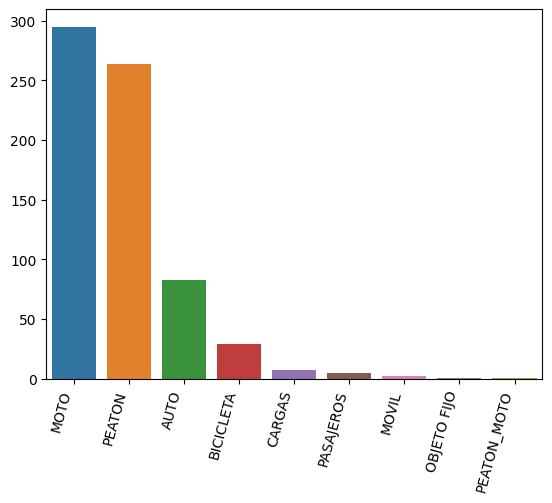

In [95]:
ax = sns.barplot(x = list(hechos["VICTIMA"].value_counts().index), y = list(hechos["VICTIMA"].value_counts().values))
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, horizontalalignment='right')
plt.show()

# FRECUENCIA DE ACUSADOS DE SINIESTROS

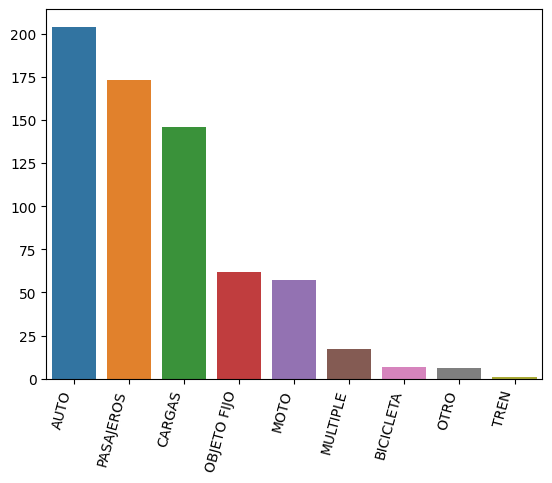

In [96]:
ax = sns.barplot(x = list(hechos["ACUSADO"].value_counts().index), y = list(hechos["ACUSADO"].value_counts().values))
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, horizontalalignment='right')
plt.show()

In [97]:
hechos.to_parquet("hechos.parquet")

# MIGRACION DE LOS DATOS


In [98]:
import mysql.connector

conexion = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="siniestros"
)

![Alt text](image-1.png)

In [99]:
hechos.info()
hechos.rename(columns={'Dirección Normalizada': 'Direccion_Normalizada'}, inplace=True)
hechos.rename(columns={'pos x': 'pos_x'}, inplace=True)
hechos.rename(columns={'pos y': 'pos_y'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   MM                     696 non-null    int64         
 4   HH                     695 non-null    float64       
 5   LUGAR_DEL_HECHO        695 non-null    object        
 6   TIPO_DE_CALLE          696 non-null    object        
 7   Calle                  695 non-null    object        
 8   Dirección Normalizada  688 non-null    object        
 9   COMUNA                 696 non-null    int64         
 10  pos x                  684 non-null    float64       
 11  pos y                  684 non-null    float64       
 12  VICTIMA                687 non-null    object        
 13  ACUSA

In [100]:
hechos.isna().sum()
hechos.dropna(inplace=True)

In [101]:
mycursor = conexion.cursor()
mycursor.execute("DROP TABLE IF EXISTS hechos")
mycursor.execute("CREATE TABLE hechos ( id INT AUTO_INCREMENT PRIMARY KEY, N_VICTIMAS INT,FECHA DATETIME, MM INT, HH DECIMAL(10, 2), LUGAR_DEL_HECHO VARCHAR(255), TIPO_DE_CALLE VARCHAR(255), Calle VARCHAR(255), Direccion_Normalizada VARCHAR(255), COMUNA INT, pos_x DECIMAL(10, 6), pos_y DECIMAL(10, 6), VICTIMA VARCHAR(255), ACUSADO VARCHAR(255))")

In [102]:
cursor = conexion.cursor()

try:
    for index, row in hechos.iterrows():
        insert_query = f"INSERT INTO hechos (N_VICTIMAS, FECHA, MM, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Direccion_Normalizada, COMUNA, pos_x, pos_y, VICTIMA, ACUSADO) VALUES ({row['N_VICTIMAS']}, '{row['FECHA']}', {row['MM']}, {row['HH']}, '{row['LUGAR_DEL_HECHO']}', '{row['TIPO_DE_CALLE']}', '{row['Calle']}', '{row['Direccion_Normalizada']}', {row['COMUNA']}, {row['pos_x']}, {row['pos_y']}, '{row['VICTIMA']}', '{row['ACUSADO']}')"
        cursor.execute(insert_query)
    conexion.commit()
except:
    cursor.close()
    conexion.close()